In [45]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/alku8270/Documents/ASTR 340/astr3400/py_mesa_reader')
import mesa_reader as m

In [13]:
#Paths
path1 = '/home/alku8270/Documents/ASTR 340/astr3400/3400final2/test1/'
path2 = '/home/alku8270/Documents/ASTR 340/astr3400/3400final2/test2/'
path3 = '/home/alku8270/Documents/ASTR 340/astr3400/3400final2/test3/'
path4 = '/home/alku8270/Documents/ASTR 340/astr3400/3400final2/test4/'

In [46]:
#Data reader setup
class datareader:
    
    def __init__(self,path):
        self.path=path
        
    def get_data(self,lognum):
        if lognum==0:
            logsZAMS=m.MesaData(file_name=self.path+f'LOGS/history.data')
            
        else:
            logsZAMS=m.MesaData(file_name=self.path+f'LOGS/profile{lognum}.data')
            
        return logsZAMS
    
    def plot_data(self,var1,var2,plt_typ,lognum=1):
        '''
        This function does all the plotting and data gathering.
        
        Inputs:
        **ALL MUST BE IN STRINGS**
        var1=x variable
        var2=y variable
        plt_typ=type of plot (normal,loglog,semilogx,semilogy)
        lognum= which log files you wish to use (use 0 for history file)
        
        Example:
        plot_data('zone','logT','normal',lognum=2)
        logZAMS=self.get_data(lognum)
        '''
        
        logsZAMS=self.get_data(lognum)
        
        if data_typ=='individual':
            x=logsZAMS.data(var1)
            y=logsZAMS.data(var2)
            
            if plt_typ=='normal':
                plt.plot(x,y)
                plt.xlabel(var1)
                plt.ylabel(var2)
            
            elif plt_typ=='loglog':
                plt.loglog(x,y)
                plt.xlabel(var1)
                plt.ylabel(var2)
            
            elif plt_typ=='semilogx':
                plt.semilogx(x,y)
                plt.xlabel(var1)
                plt.ylabel(var2)
        
            elif plt_typ=='semilogy':
                plt.semilogy(x,y)
                plt.xlabel(var1)
                plt.ylabel(var2)
                
            else:
                print('Unsupported plot type')
            

### HR Diagrams

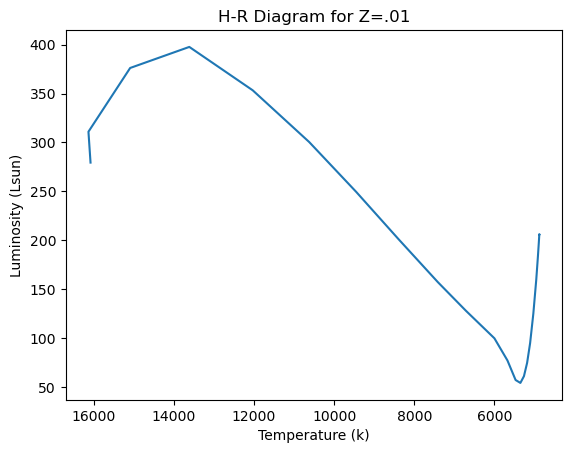

In [54]:
#Zbase = .01
dr1=datareader(path1)
zams1=dr1.get_data(0)

logT1=zams1.data('log_Teff')
logL1=zams1.data('log_L')

T1=10**logT1
L1=10**logL1

plt.plot(T1,L1)
plt.gca().invert_xaxis()
plt.xlabel('Temperature (k)')
plt.ylabel('Luminosity (Lsun)')
plt.title('H-R Diagram for Z=.01')
plt.show()

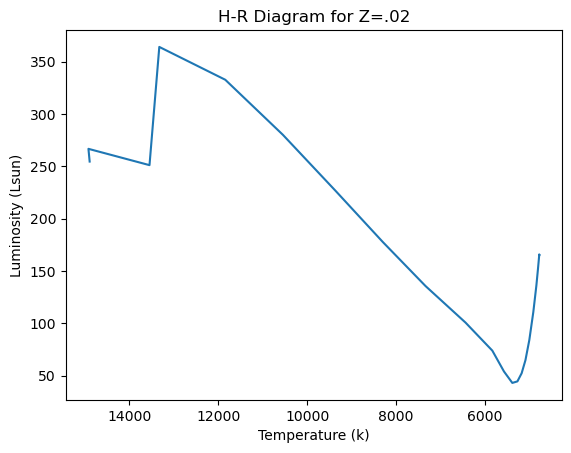

In [62]:
#Zbase = .02
dr2=datareader(path2)
zams2=dr2.get_data(0)

logT2=zams2.data('log_Teff')
logL2=zams2.data('log_L')

T2=10**logT2
L2=10**logL2

plt.plot(T2,L2)
plt.gca().invert_xaxis()
plt.xlabel('Temperature (k)')
plt.ylabel('Luminosity (Lsun)')
plt.title('H-R Diagram for Z=.02')
plt.show()

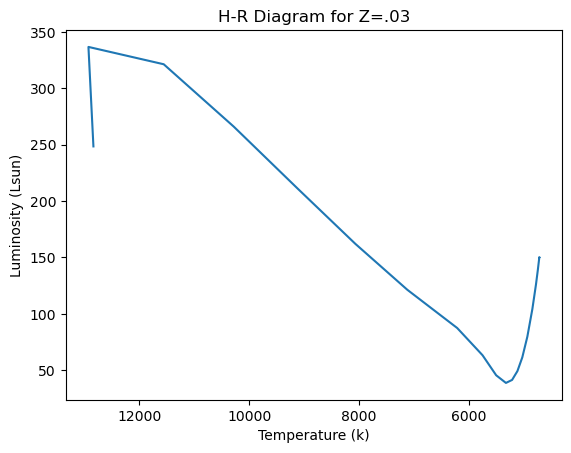

In [55]:
#Zbase = .03
dr3=datareader(path3)
zams3=dr3.get_data(0)

logT3=zams3.data('log_Teff')
logL3=zams3.data('log_L')

T3=10**logT3
L3=10**logL3

plt.plot(T3,L3)
plt.gca().invert_xaxis()
plt.xlabel('Temperature (k)')
plt.ylabel('Luminosity (Lsun)')
plt.title('H-R Diagram for Z=.03')
plt.show()

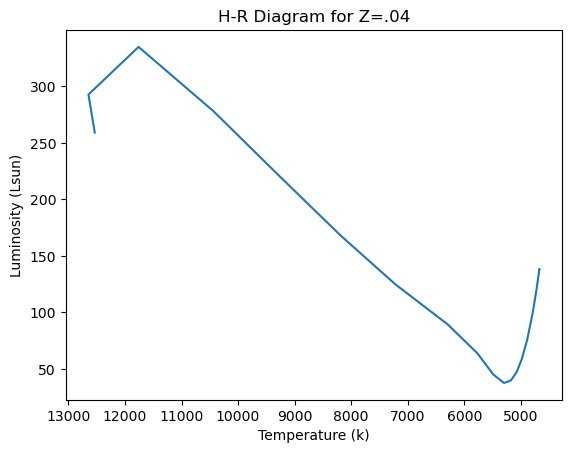

In [56]:
#Zbase = .04
dr4=datareader(path4)
zams4=dr4.get_data(0)

logT4=zams4.data('log_Teff')
logL4=zams4.data('log_L')

T4=10**logT4
L4=10**logL4

plt.plot(T4,L4)
plt.gca().invert_xaxis()
plt.xlabel('Temperature (k)')
plt.ylabel('Luminosity (Lsun)')
plt.title('H-R Diagram for Z=.04')
plt.show()

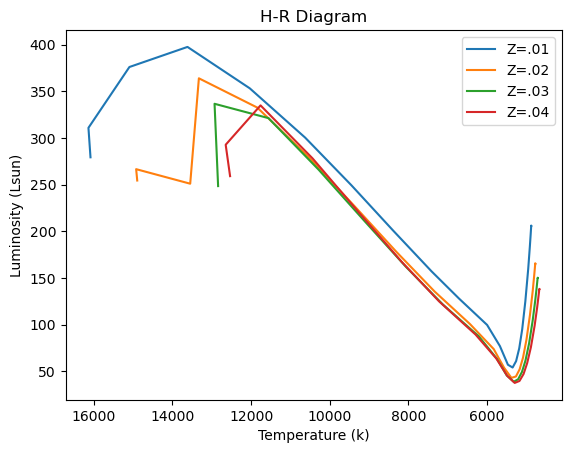

In [60]:
#All together
plt.plot(T1,L1,label='Z=.01')
plt.plot(T2,L2,label='Z=.02')
plt.plot(T3,L3,label='Z=.03')
plt.plot(T4,L4,label='Z=.04')
plt.gca().invert_xaxis()
plt.xlabel('Temperature (k)')
plt.ylabel('Luminosity (Lsun)')
plt.title('H-R Diagram')
plt.legend()
plt.show()

### Radii

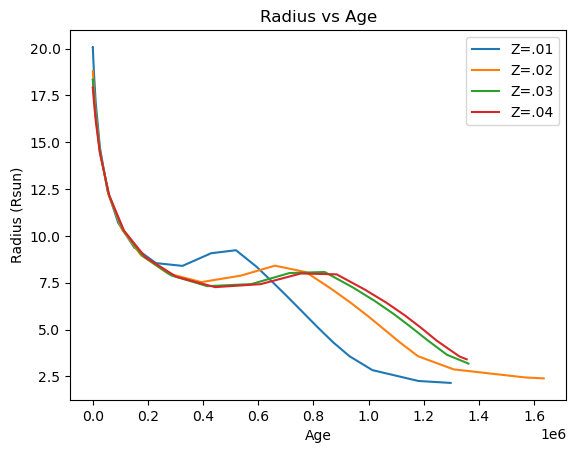

In [77]:
dr_list=[]
path_list=[path1,path2,path3,path4]
z_list=['Z=.01','Z=.02','Z=.03','Z=.04']
def plot_radii():

    for i in range(len(path_list)):
        dr_list.append(datareader(path_list[i]))

        data=dr_list[i].get_data(0)
        x=data.data('star_age')
        y=data.data('log_R')

        plt.plot(x,10**y,label=z_list[i])
        
    plt.legend()
    plt.xlabel('Age')
    plt.ylabel('Radius (Rsun)')
    plt.title('Radius vs Age')
    plt.show()


plot_radii()

### Mass

In [106]:
#Jeans mass formula

Msun  = 1.989e33     # solar mass; g
G = 6.6726e-8        #cgs G
Rsun = 6.955e10      #solar radius; cm

##DENSITY
def get_rho(m,r):
    #Assumes spherical gas cloud (could update later to use integral notation)
    rho=m/((4/3*np.pi)*r**3)
    return rho


##JEANS MASS
def jeans_mass(m0,r0,P0):
    gamma=1.4 #assume a common value for a diatomic gas
    ks=gamma*P0
    
    
    
    rho=get_rho(m0*Msun,r0*Rsun)
    vs=np.sqrt(ks/rho)
    kj=np.sqrt(4*np.pi*G*rho)/vs
    rj=np.pi/kj
    MJ=(4*np.pi/3)*rho*(rj/2)**3
    return MJ/Msun


m0=(dr1.get_data(0)).data('star_mass')[0]
r0=10**((dr1.get_data(0)).data('log_R'))[0]
P0=10**((dr1.get_data(0)).data('log_cntr_P'))[0]
MJ=jeans_mass(m0,r0,P0)
m0

4.0

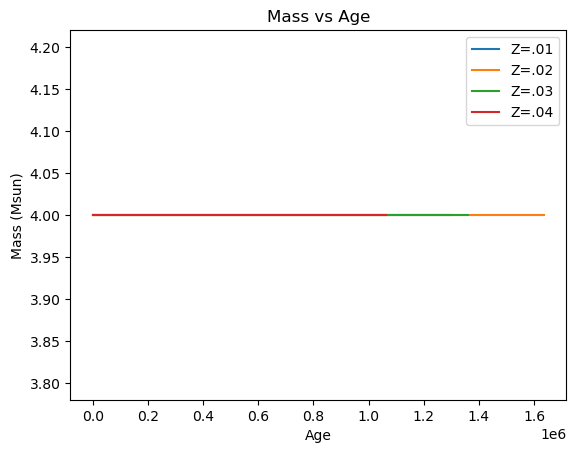

In [105]:
dr_list=[]
path_list=[path1,path2,path3,path4]
z_list=['Z=.01','Z=.02','Z=.03','Z=.04']
def plot_mass():

    for i in range(len(path_list)):
        dr_list.append(datareader(path_list[i]))

        data=dr_list[i].get_data(0)
        x=data.data('star_age')
        y=data.data('star_mass')

        plt.plot(x,y,label=z_list[i])
        
    plt.legend()
    plt.xlabel('Age')
    plt.ylabel('Mass (Msun)')
    plt.title('Mass vs Age')
    plt.show()


plot_mass()